In [1]:
# Подключим нужные для базовых операций библиотеки
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Подключим пакеты для использования OLS метода и тестов
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Подгрузим полезные функции
from utils import *

# Сделаем автоподгрузку всех изменений при перепрогонке ячейки
%load_ext autoreload
%autoreload 2

In [2]:
# Определим параметры выборки для задачи мультиколлинеарности
# Создадим удобный словарь, чтобы передавать его в функцию
dist_params = dict(

    # Зададим параметры распределения факторов
    x1_mean = 100.0,
    x1_std = 10.0,
    x2_mean = 20.0,
    x2_std = 5.0,
    x3_mean = 30.0,
    x3_std = 8.0,
    corr_12 = 0,
    corr_23 = 0.8,
    corr_13 = 0,
    
    # Зададим параметры распределения ошибки
    e_mean = 0.0,
    e_std = 3.0,

    # Укажем размер выборки
    N = 1000,

    # Зададим действительные параметры модели
    beta0 = 500.0,
    beta1 = -6.7,
    beta2 = 2.3,
    beta3 = 17.7
)

# Установим стартовую точку для алгоритма генерации случайных чисел
RANDOM_SEED = 42

,x1,x2,x3,e,y
0,104.967142,19.116106,31.932229,-5.723423,400.164234
1,115.230299,21.579319,31.544465,-2.581155,333.345310
2,115.792128,17.682403,23.332455,-1.240817,176.605907
3,105.425600,23.131081,33.053639,5.663063,437.562431
4,102.419623,32.469672,42.864252,1.669659,648.835695
...,...,...,...,...,...
995,90.399537,20.328264,31.089870,0.085373,491.454176
996,88.697963,5.802484,12.930729,-6.233435,141.709836
997,106.021183,20.171058,29.155871,-0.960893,351.149530
998,90.480815,19.060755,29.722963,4.930134,468.644848


[]

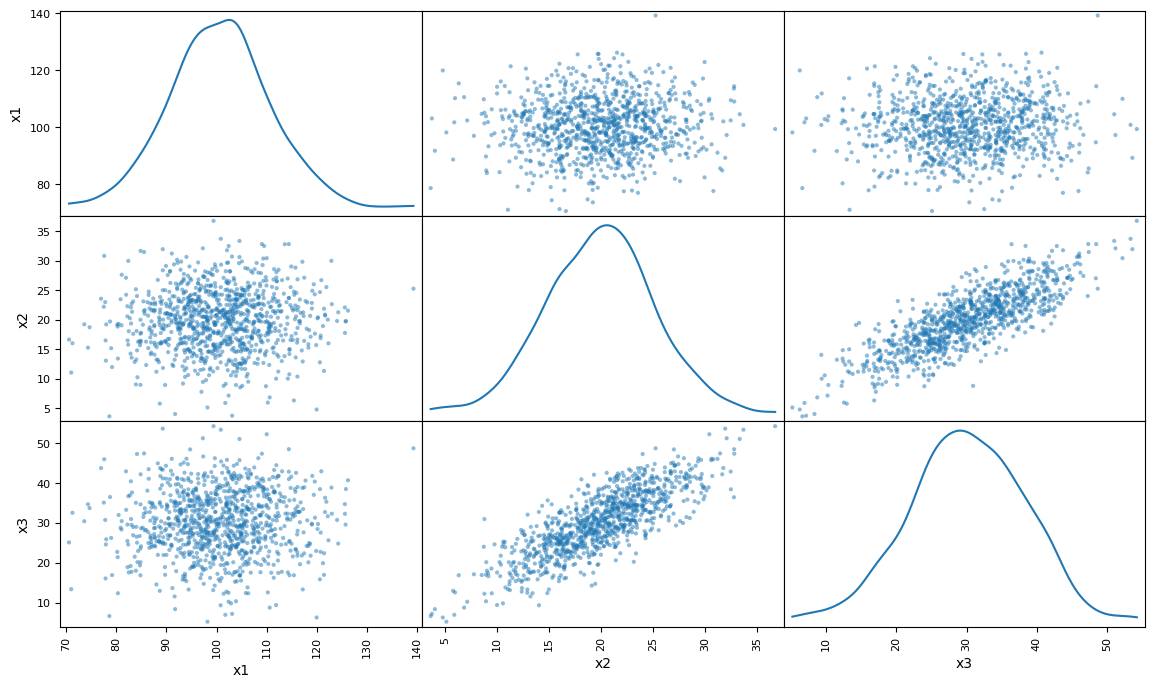

In [4]:
# Сгенерируем датасет с нормальным распределением в регрессоре
dt_collinearity = gen_data(y_type='multivariate', params=dist_params, seed=RANDOM_SEED)

display(dt_collinearity)

# Посмотрим на корреляции глазами
pd.plotting.scatter_matrix(dt_collinearity[['x1', 'x2', 'x3']], figsize = (14,8), diagonal = 'kde')
plt.plot()

In [12]:
# Обучим модель и выведем результаты
dt_collinearity, model_collinearity = train_model(dt_collinearity, target='y', feature_names=['x1', 'x2', 'x3'], show_summary=True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.235e+05
Date:                Sun, 03 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:04:54   Log-Likelihood:                -2542.6
No. Observations:                1000   AIC:                             5093.
Df Residuals:                     996   BIC:                             5113.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        499.0000      1.072    465.494      0.0

## Интерпретация

Из таблицы видно, что наша модель хорошо объясняет дисперсию зависимой переменной, т.к. ее $r^2 = 1$, что является хорошим показателям для таких данных.
\
Также модель предсказывает коэффициенты, с ошибкой в $ 0.2 - 5 \% $ (499 vs 500, -6.7 vs -6, 2.34 vs 2.3, 17.69 vs 17.7)
\
Значения стандартных ошибок коэффициентов близки к 0 ($x_1 = 0.01, x_2 = 0.03, x_3 = 0.02, const = 1.072$), что опять же говорит о хорошей способности модели объяснять таргет.
\
Для каждого коэффициента t-statistics представлены свои p-value, которые равны 0, что говорит о статистической значимости все коэффициентов. 
\
Доверительные интервалы покрывают настоящие значения кожффициентов.
\
F-statistics = 9.235e+05, а Prob (F-statistic) близко к нулю, что говорит о статистической значимости модели в целом. 
\
AIC и BIC равны 5093 и 5113 соответственно. Эти метрики обратно пропорционально показывают качество модели. В нашем случае они отностиельно небольшие, что говорит об относительно хорошем качестве модели.